In [18]:
import matplotlib.pyplot as plt
import numpy as np

we will bw plotting several graphs in this notebook , so its good to have a utility function for that. 
The following code willl visualize numpy arrays into a graph using Pyplot's plot() method.
The x axis will contain the time steps. The exact unit is not critical for this exercise so you can pretend it is either seconds, hours, year, etc. The  y-axis will contain the measured values at each time step.

In [19]:
def plot_series(time,series, format="-",start=0,end=None,label=None):
    """
    Visualize time series data
    
    Arguments:
    time(array of int) - contains the time steps
    series(array of int)- contains the measurements for each time step
    format(string) - line style when plotting the graph
    start(int)- first tiem step to plot
    end(int)- last time step to plot
    label(list of string)-tag for the line
    """
    # setup the dimension of the graph figure
    plt.figure(figsize=(10,6))
    
    #plot the time series data
    plt.plot(time[start:end], series[start:end], format)
    
    #label the x-axis
    plt.xlabel("Time")
    
    #label the y-axis
    plt.ylabel("Value")
    
    if label:
        plt.legend(fontsize=14,label=label)
     
    #overlay a grid on the graph
    plt.grid(True)
    
    #Draw the graph on screen
    plt.show

The trend describes the general tendency of the values to go up and down as time progresses. Given a certain time period, you can see if the graph is following an upward/positve trend,downward/negative trend, or just flat. For instance, the housing prices in a good location increase in valuation as time passes.
The simplest example to visualise is the data that follows a straight line. You will use the function below to generate that. The slope argument will determine what the trend is. If you are comng with a mathematics background, you might recognize this as the slop-intercept form with y-intercept being 0.

In [20]:
def trend(time, slope=0):
    """
    Generate synthetic data that follows a straight line given a slope value.#
    Arguments:
    time(array of int)- contains the time steps
    slope(float)- determines the direction and steepness of the line
    
    Returns:
    series(array of float)- measurements that follow a straight line
    """
    # Compute the linear series given the slope
    series=slope*time
    
    return series

Here a time series that trends upward.For a downward trend, simply replace the slope value below with a  negative value(e.g.-0.4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TypeError: __init__() got an unexpected keyword argument 'label'

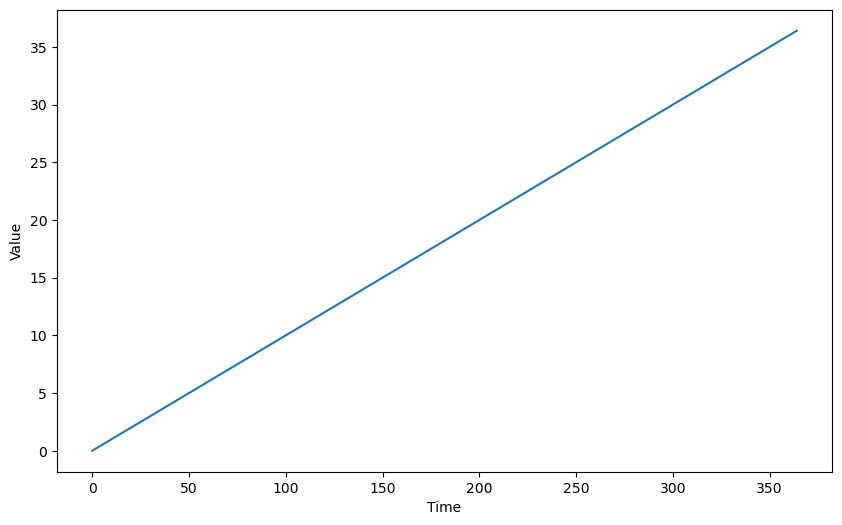

In [21]:
# Generate time steps.Assume 1 per day for one year(365 days)
time=np.arange(365)

#Define the slope
slope=0.1

# generate measurements with the defined slope
series=trend(time,slope)

#plot the results
plot_series(time,series,label=[f'slope={slope}'])

we don't need machine learning to model this behabior. we can simply solve for the equation of the line and you have the perfect predicition model. Data like this is extremely rare in real world applications though and the trend line is simply used as a guide.

Sesonality:

Another attribute you may want to look for is seasonality. This refers to a recurring pattern at regualar time intevals. For instance, the hourly temperature might oscillate similarly for 10 consecutive day and you can use that to predict the behavior on the next day.
The functions below to generate a time series with a seasonal pattern:

In [25]:
def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Arguments:
    season_time(array of float)-contains the measurements per time step
    
    Returns:
    data_patttern(array of float)- contains revised measuremnts values according to the defined pattern"""
    
    #generate teh values using an arbritrary pattern
    data_pattern = np.where(season_time<0.4,
                           np.cos(season_time*2*np.pi),
                           1/np.exp(3*season_time))
    return data_pattern

def seasonality(time,period,amplitude=1,phase=0):
    """
    Repeats the smae pattern at each period
    Arguments:
    time(array of int)- contains the time steps
    period(int)-number of time steps before tha pattern repeats
    amplitude(int)-peak measured value ina period
    phase(int)-number of time steps to shift the measured values

    Returns:
    data_pattern(array of float)-seasonal data scaled by the defined aplitude"""

    #define the measured values
    season_time = ((time+phase)% period)/period

    #generate the seasonal data scaled by the defined amplitude
    data_pattern=amplitude*seasonal_pattern(season_time)

    return data_pattern

The cell below shoes the seasonality of the data generated because you can see the pattern every 365 time steps.


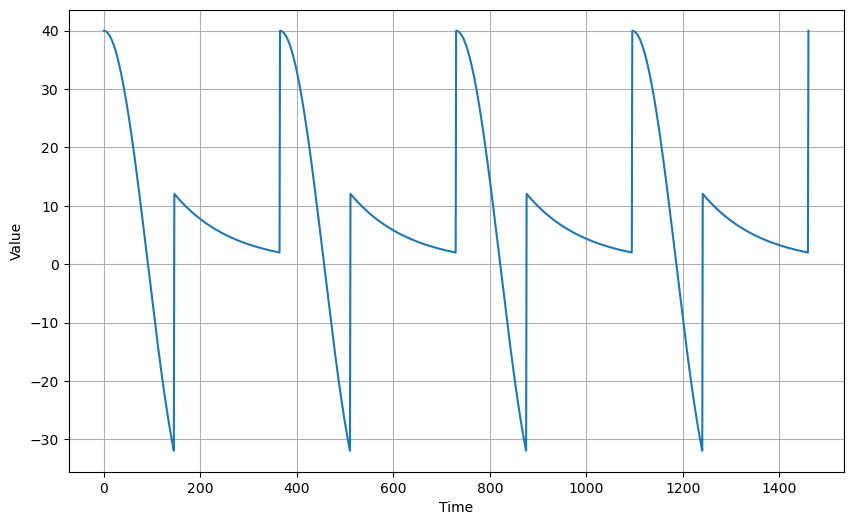

In [28]:
# Generate time steps
time = np.arange(4*365+1)

#define the parameters of the seasonal data
period=365
amplitude = 40

#generate teh seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

#plot the results
plot_series(time,series)

A time series can have both trend and seasonality. For example, the hourly temperature might oscillate regulary in short time frames, but it might show an upward trend if you look at multu-year data.
The example below demonstrates a seasonal pattern with an upward trend:

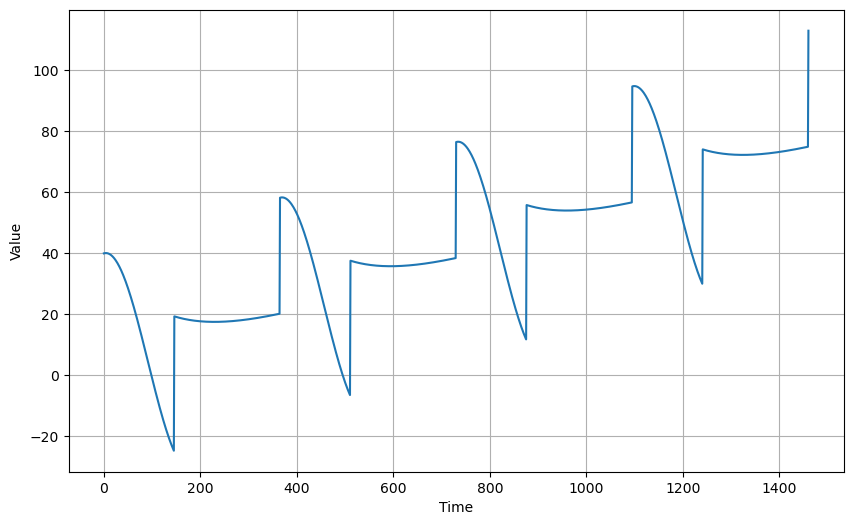

In [29]:
# define seasonal parameters
slope= 0.05
period= 365
amplitude = 40

#generate the data
series = trend(time,slope)+seasonality(time, period=period, amplitude=amplitude)

# plot the results
plot_series(time,series)

Noise:
In practice, few real time series have such a smooth signal. They usually have some noise riding over the signal.The next cells will show what a noisy signal looks like:

In [30]:
def noise(time,noise_level=1,seed=None):
    """
    Generaetes anormally distributed noisy signal
    
    Arguments:
    time(array of int)- contains the time steps
    noise_level(float)-scaling factor for the generated signal
    seed(int)- number generator seed for repeatability
    
    Returns:
    noise(array of float)- the noisy signal
    """
    #inintialize the random number generator
    rnd=np.random.RandomState(seed)
    
    # Generate a random number for each time step and scale by the noise level
    noise=rnd.randn(len(time))*noise_level
    
    return noise

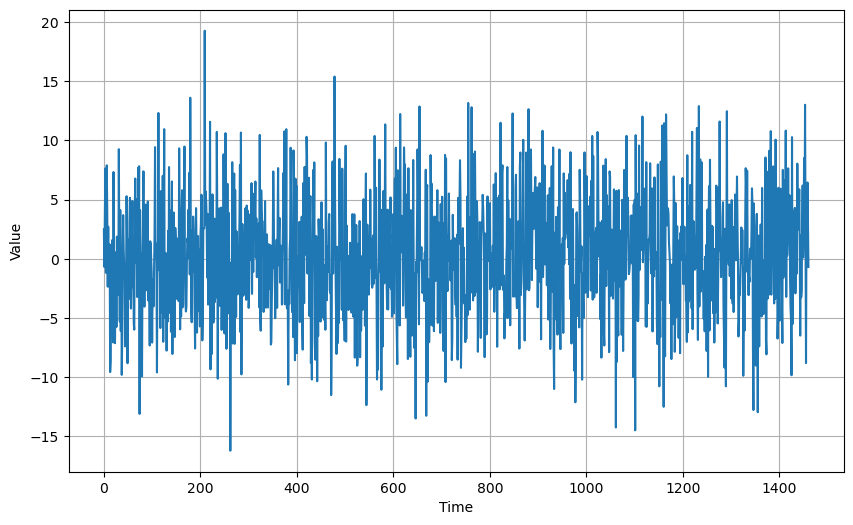

In [32]:
#Define noise level
noise_level = 5
#generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

#plot the results
plot_series(time, noise_signal)

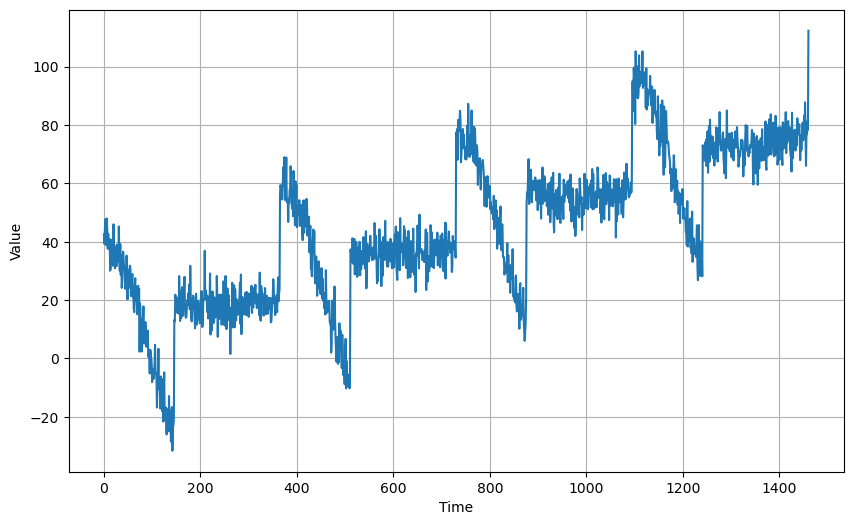

In [33]:
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

it is still upward trending and seasonal but there is more variation between time steps because of the added noise.

Autocorrelation:
Time series can also be autosorrelated. This means the measurements at a given tiem step is a function of previous time steps. Here are some functions that demonstrate that. Notice lines that refer to the step variable because this where the computation from previous time steps happen. It will also include noise(i.e. random numbers) to make the result a bit more realistic.

In [34]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)
    
    # Initialize array of random numbers equal to the length 
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)
    
    # Set first 50 elements to a constant
    ar[:50] = 100
    
    # Define scaling factors
    phi1 = 0.5
    phi2 = -0.1

    # Autocorrelate element 51 onwards with the measurement at 
    # (t-50) and (t-30), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    
    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar

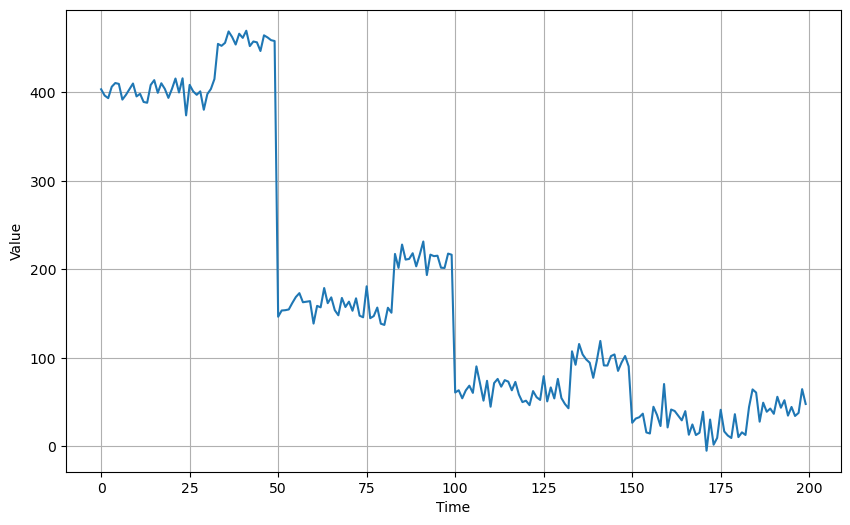

In [35]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

Here  is a more straight forward autocorrelation function which just computes a value from the previous time step.

In [36]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length 
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at 
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    
    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude
    
    return ar

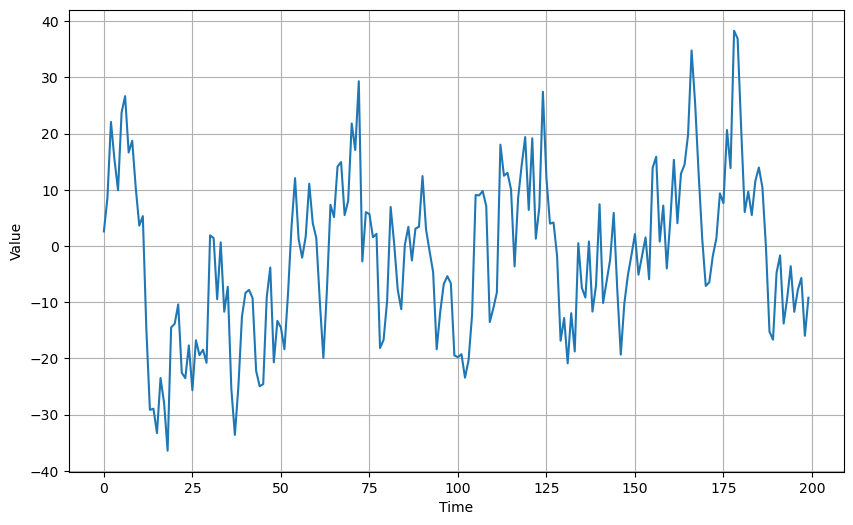

In [37]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

Another autocorrelated time series you might encounter is one where it dacays predictably after random spikes. You will first define the function that generates these spikes below.

In [38]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses)

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude

    return series    

You will use the function above to generate a series with 10 random impulses

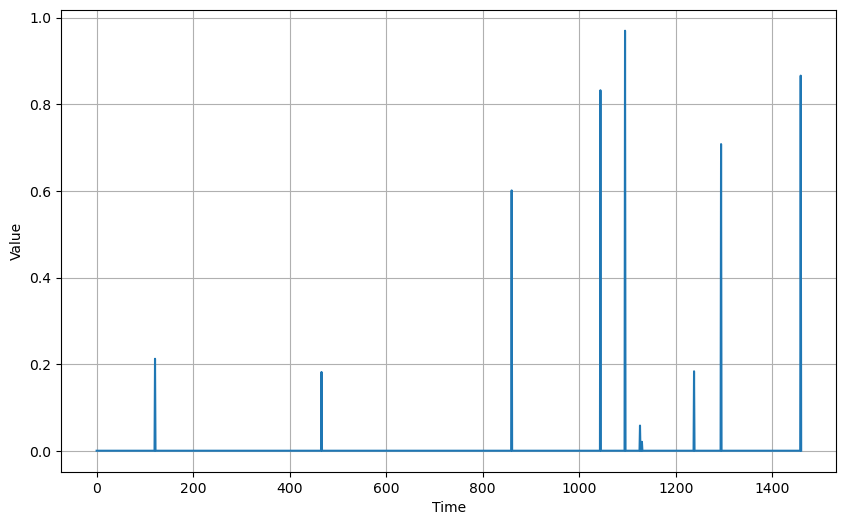

In [39]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

Now that we have the time series, we will next define the function that will decay teh next values after it spikes.

In [41]:
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

You can then use the function to generate the decay after the spikes. Here is one example that generates the next value from the previous time step (i.e. `t-1`, where `t` is the current time step):

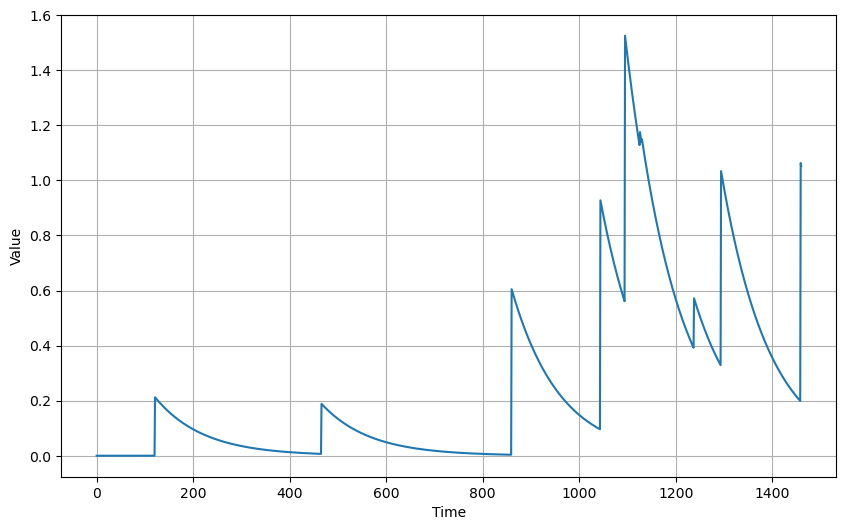

In [42]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

Here is another example where the next values are computed from those in `t-1` and `t-50`:

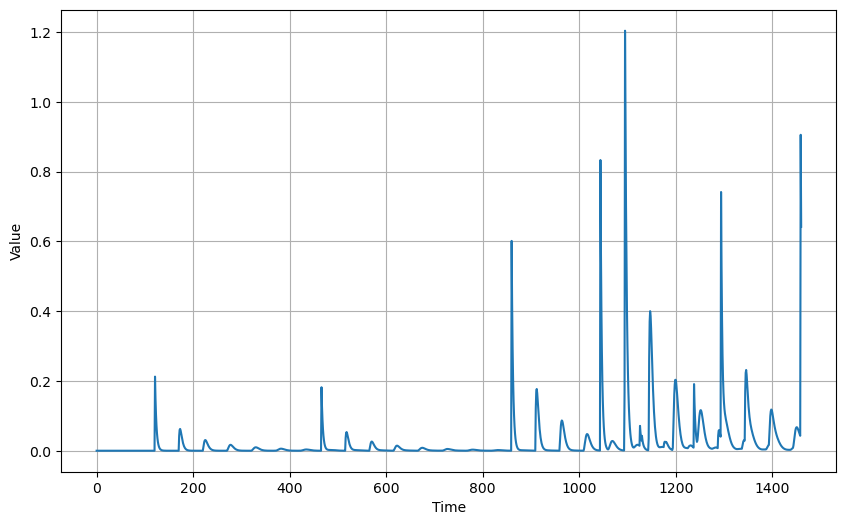

In [43]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

Autocorrelated data can also ride a trend line and it will look like below.

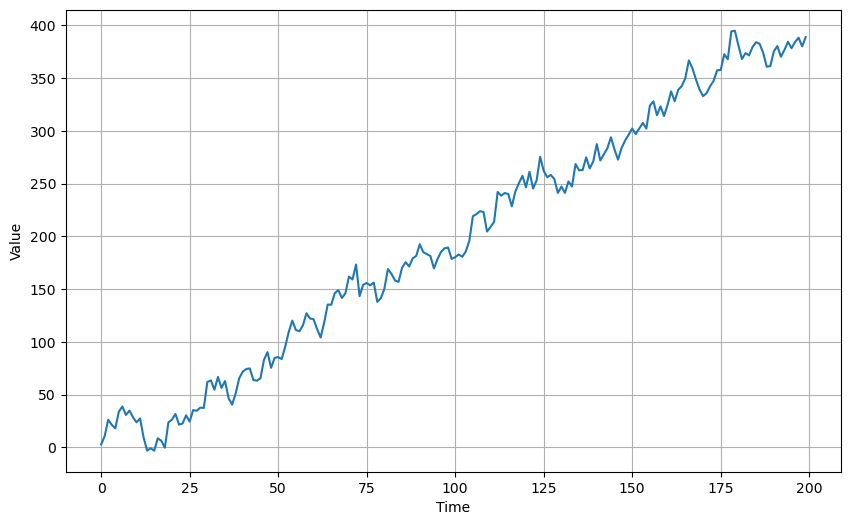

In [44]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

Similarly, seasonality can also be added to this data.

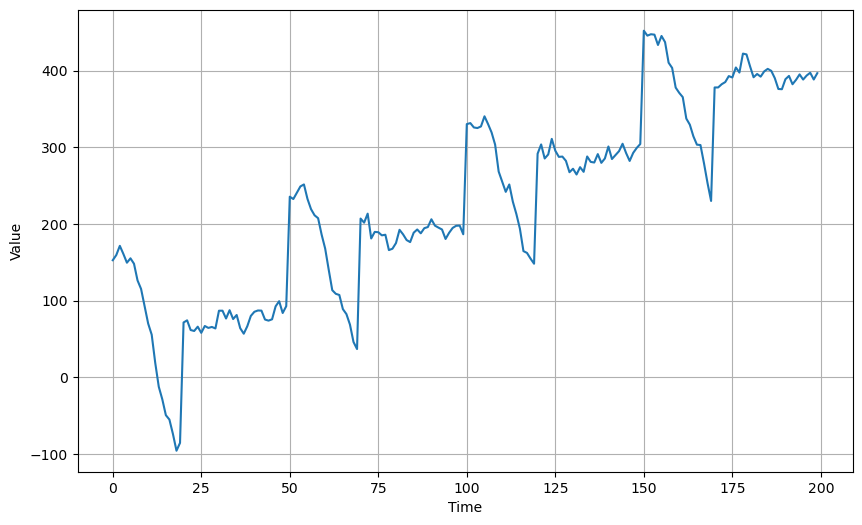

In [50]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])


Non-stationary Time series:

It is possible for the time series to break an expected pattern.Big events can alter the trend or seasinal beahaviour of the data. it would look something like the below where the graph shifted to a downward trend at the time step=200.

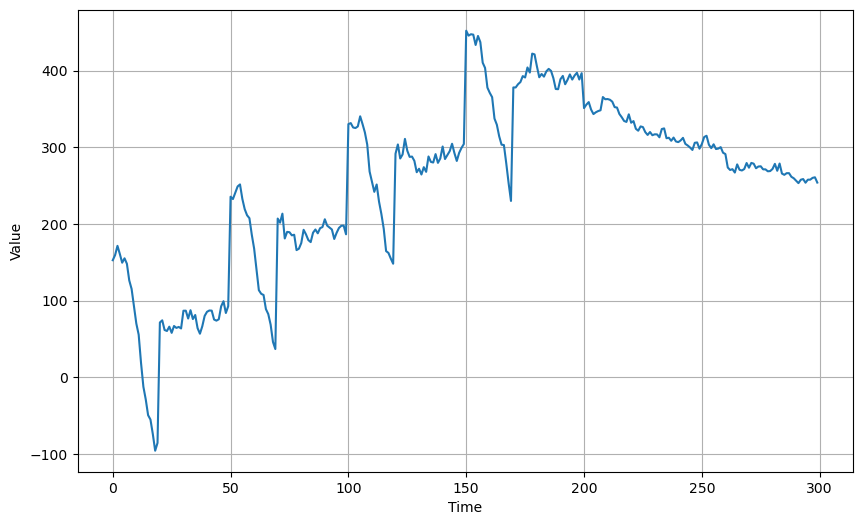

In [51]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])

In case you may want to train the model on the later steps(i.e. starting at t=200) since these present a stronger predictive signal to future time steps.